/usr/local/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


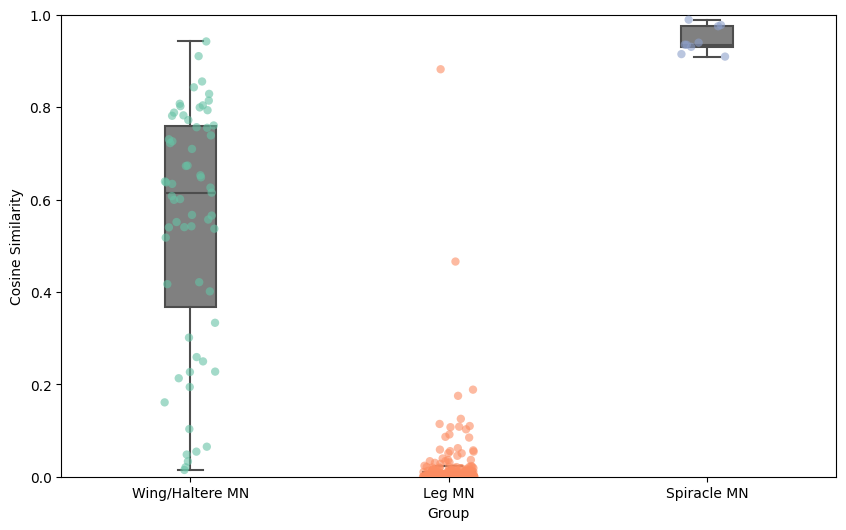

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt  # Import ptitprince for raincloud plot

# Step 1: Load data from each Excel file
wing_df = pd.read_excel('/Users/camellyc/Desktop/Connectomics/MANC/winghaltereMN_cosine_similarity_results.xlsx')
leg_df = pd.read_excel('/Users/camellyc/Desktop/Connectomics/MANC/legMN_cosine_similarity_results.xlsx')
sp_df = pd.read_excel('/Users/camellyc/Desktop/Connectomics/MANC/spMN_cosine_similarity_results.xlsx')

# Step 2: Add a new column to identify each dataset
wing_df['Group'] = 'Wing/Haltere MN'
leg_df['Group'] = 'Leg MN'
sp_df['Group'] = 'Spiracle MN'

# Step 3: Concatenate all the data into a single DataFrame
combined_df = pd.concat([wing_df[['cosine_similarity', 'Group']],
                         leg_df[['cosine_similarity', 'Group']],
                         sp_df[['cosine_similarity', 'Group']]], ignore_index=True)

# Step 4: Remove rows with NaN cosine similarity values (if any)
combined_df = combined_df.dropna(subset=['cosine_similarity'])

# Step 5: Create the plot with rain plot (stripplot) and boxplot
plt.figure(figsize=(10, 6))

# Plot the rain plot (scatter plot) using stripplot
sns.stripplot(x='Group', y='cosine_similarity', data=combined_df, 
              palette='Set2', jitter=True, dodge=True, size=6, alpha=0.6)

# Overlay the boxplot without the line connecting them
sns.boxplot(x='Group', y='cosine_similarity', data=combined_df,
            width=0.2, fliersize=0, color='gray')

# Step 6: Customize the plot
plt.ylim(0, 1)
plt.ylabel('Cosine Similarity')

plt.savefig('/Users/camellyc/Desktop/Connectomics/MANC/cosine_similarity_comparison.svg', format='svg')

# Show the plot
plt.show()
